In [11]:
from __future__ import absolute_import
from __future__ import absolute_import
from __future__ import division
from __future__ import division
from __future__ import print_function
from __future__ import print_function

import numpy as np


class LinearNumpy(object):

    def __init__(self, in_features, out_features):
        """
        Module initialisation.
        Args:
            in_features: input_data dimension
            out_features: output dimension
        1) Initialize weights self.params['weight'] using normal distribution with mean = 0 and std = 0.0001.
        2) Initialize biases self.params['bias'] with 0.
        3) Initialize gradients with zeros.
        """
        self.x = None
        self.in_features = in_features
        self.out_features = out_features

        self.params = {'weight': np.random.randn(in_features, out_features) * 0.0001,
                       'bias': np.zeros(self.out_features)}
        self.grads = {'weight': np.random.randn(in_features, out_features) * 0.0001,
                      'bias': np.zeros(self.out_features)}

    def forward(self, x, flag=True):
        """
        Forward pass (i.e., compute output from input_data).
        Args:
            x: input_data to the module
        Returns:
            out: output of the module
        Hint: Similarly to pytorch, you can store the computed values inside the object and use them in the backward
        pass computation. This is true for *all* forward methods of *all* modules in this class.
        """
        if flag:
            self.x = x
        out = np.dot(x, self.params['weight']) + self.params['bias']
        return out

    def backward(self, dout):
        """
        Backward pass (i.e., compute gradient).
        Args:
            dout: gradients of the previous module
        Returns:
            dx: gradients with respect to the input_data of the module
        Implement backward pass of the module. Store gradient of the loss with respect to layer parameters in
        self.grads['weight'] and self.grads['bias'].
        """
        self.grads['weight'] = np.dot(self.x.transpose(), dout)
        self.grads['bias'] = np.mean(dout, axis=0)
        dx = np.dot(dout, self.params['weight'].transpose())
        return dx

    def update(self, lr):
        self.params['weight'] -= lr * self.grads['weight']
        self.params['bias'] -= lr * self.grads['bias']

    __call__ = forward


class ReLUNumpy(object):
    def __init__(self):
        self.x = None

    def forward(self, x, flag=True):
        """
        Forward pass.
        Args:
            x: input_data to the module
        Returns:
            out: output of the module
        """
        out = np.maximum(0, x)
        if flag:
            self.x = out
        return out

    def backward(self, dout):
        """
        Backward pass.
        Args:
            dout: gradients of the previous module
        Returns:
            dx: gradients with respect to the input_data of the module
        """
        self.x[self.x > 0] = 1
        self.x[self.x <= 0] = 0
        dx = dout * self.x
        return dx

    __call__ = forward


class SoftMaxNumpy(object):
    def __init__(self):
        self.x = None

    def forward(self, x, flag=True):
        """
        Forward pass.
        Args:
            x: input_data to the module
        Returns:
            out: output of the module
        Implement forward pass of the module. To stabilize computation you should use the so-called Max Trick
        https://timvieira.github.io/blog/post/2014/02/11/exp-normalize-trick/
        """
        for i in range(len(x)):
            x[i] -= max(x[i])
            x[i] = np.exp(x[i])
            x[i] /= sum(x[i])
        if flag:
            self.x = x
        out = x
        return out

    def backward(self, dout):
        """
        Backward pass.
        Args:
            dout: gradients of the previous module
        Returns:
            dx: gradients with respect to the input_data of the module
        """
        return dout

    __call__ = forward


class CrossEntropyNumpy(object):

    def forward(self, x, y):
        """
        Forward pass.
        Args:
            x: input_data to the module
            y: labels of the input_data
        Returns:
            out: cross entropy loss
        """
        x += 1e-7
        out = -np.mean(y * np.log(x))
        return out

    def backward(self, x, y):
        """
        Backward pass.
        Args:
            x: input_data to the module
            y: labels of the input_data
        Returns:
            dx: gradient of the loss with respect to the input_data x.
        """
        # softmax+交叉熵的求导
        dx = x - y
        return dx

    __call__ = forward


In [12]:
class MLP(object):

    def __init__(self, n_inputs, n_hidden, n_classes):
        """
        Initializes multi-layer perceptron object.
        Args:
            n_inputs: number of inputs (i.e., dimension of an input_data vector).
            n_hidden: list of integers, where each integer is the number of units in each linear layer
            n_classes: number of classes of the classification problem (i.e., output dimension of the network)
        """
        input_layer = [LinearNumpy(n_inputs, n_hidden[0]), ReLUNumpy()]
        output_layer = [LinearNumpy(n_hidden[-1], n_classes), SoftMaxNumpy()]
        hidden_layer = []
        for i in range(len(n_hidden) - 1):
            hidden_layer.append(LinearNumpy(n_hidden[i], n_hidden[i + 1]))
            hidden_layer.append(ReLUNumpy())

        self.layers = input_layer + hidden_layer + output_layer
        self.loss_fc = CrossEntropyNumpy()

    def forward(self, x):
        """
        Predict network output from input_data by passing it through several layers.
        Args:
            x: input_data to the network
        Returns:
            x: output of the network
        """
        for layer in self.layers:
            x = layer(x)
        out = x
        return out

    def backward(self, dout):
        """
        Performs backward propagation pass given the loss gradients.
        Args:
            dout: gradients of the loss
        """
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        dx = dout
        return dx

    def predict(self, x):
        flag = False
        for layer in self.layers:
            x = layer(x, flag)
        out = x
        return out

    __call__ = forward


In round 0, the loss is 0.3465734917778609, the accuracy is 0.505.
In round 10, the loss is 0.19933405935801662, the accuracy is 0.765.
In round 20, the loss is 0.12142919514109501, the accuracy is 0.84.
In round 30, the loss is 0.1194366344969935, the accuracy is 0.84.
In round 40, the loss is 0.11842115523058737, the accuracy is 0.845.
In round 50, the loss is 0.11829379378863518, the accuracy is 0.845.
In round 60, the loss is 0.11850320469844972, the accuracy is 0.84.
In round 70, the loss is 0.12144322097255408, the accuracy is 0.84.
In round 80, the loss is 0.12695457963456835, the accuracy is 0.83.
In round 90, the loss is 0.12595040516434847, the accuracy is 0.83.
In round 100, the loss is 0.12170096470549424, the accuracy is 0.84.
In round 110, the loss is 0.1191861988405604, the accuracy is 0.845.
In round 120, the loss is 0.11782274776411374, the accuracy is 0.845.
In round 130, the loss is 0.11764632854286176, the accuracy is 0.845.
In round 140, the loss is 0.1175092354845

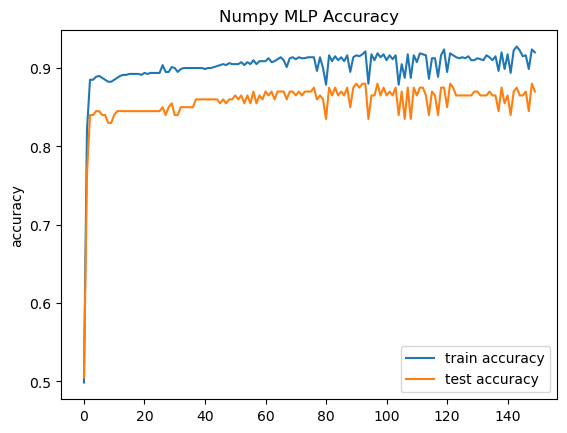

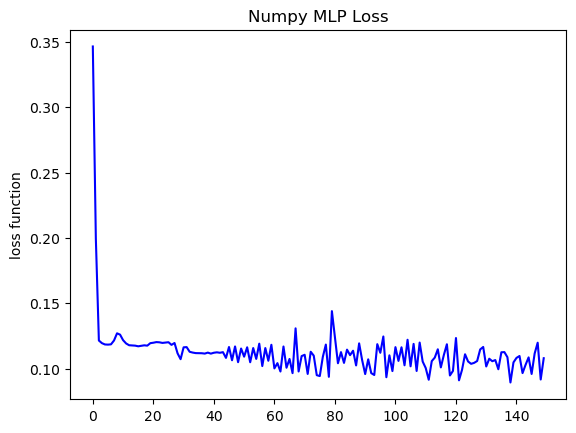

In round 0, the loss is 0.6969226002693176, the test accuracy is 0.0, and the train accuracy is 0.0.
In round 10, the loss is 0.6854493618011475, the test accuracy is 0.0, and the train accuracy is 0.0.
In round 20, the loss is 0.6739104986190796, the test accuracy is 0.0, and the train accuracy is 0.0.
In round 30, the loss is 0.6625543832778931, the test accuracy is 0.0, and the train accuracy is 0.0.
In round 40, the loss is 0.6516101956367493, the test accuracy is 0.0, and the train accuracy is 0.0.
In round 50, the loss is 0.6412569284439087, the test accuracy is 0.49000000953674316, and the train accuracy is 0.5174999833106995.
In round 60, the loss is 0.6316071152687073, the test accuracy is 0.7250000238418579, and the train accuracy is 0.7300000190734863.
In round 70, the loss is 0.6227060556411743, the test accuracy is 0.8299999833106995, and the train accuracy is 0.8450000286102295.
In round 80, the loss is 0.6145458817481995, the test accuracy is 0.8399999737739563, and the 

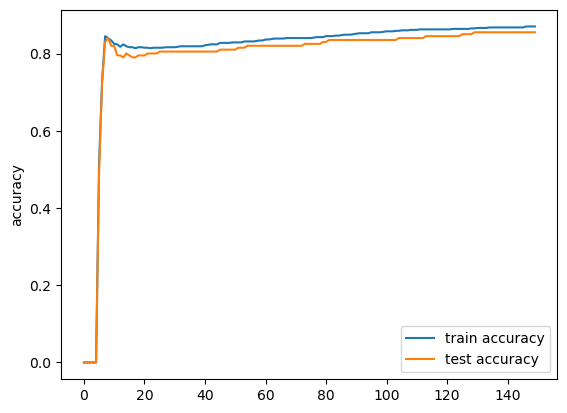

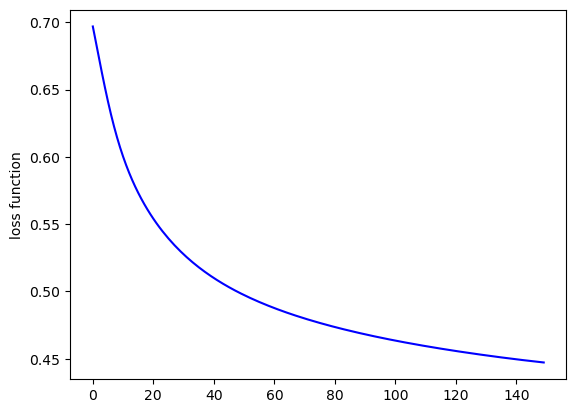

In [16]:
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons


# Default constants
DNN_HIDDEN_UNITS_DEFAULT = '20'
LEARNING_RATE_DEFAULT = 1e-2
MAX_EPOCHS_DEFAULT = 1500
EVAL_FREQ_DEFAULT = 10
SGD_DEFAULT = False
FLAGS = None


def oneHot(labels, dim=None):
    if dim is None:
        dim = np.max(labels) + 1
    one_hot = np.zeros((len(labels), dim))
    one_hot[np.arange(len(labels)), labels] = 1
    return one_hot


def accuracy(predictions, labels):
    """
    Computes the prediction accuracy, i.e., the average of correct predictions
    of the network.
    Args:
        predictions: 2D float array of size [number_of_data_samples, n_classes]
        labels: 2D int array of size [number_of_data_samples, n_classes] with one-hot encoding of ground-truth labels
    Returns:
        accuracy: scalar float, the accuracy of predictions.
    """
    correct = 0
    # print(predictions)
    for i, pred in enumerate(predictions):
        if np.argmax(pred) == np.argmax(labels[i]):
            correct += 1
    return correct / len(predictions)


def train(epoch, hidden_list, freq, lr, sgd, train_set, test_set):
    """
    Performs training and evaluation of MLP model.
    NOTE: You should the model on the whole test set each eval_freq iterations.
    """
    train_x, train_y = train_set
    test_x, test_y = test_set
    train_acc_list, test_acc_list, loss_list = [], [], []
    module = MLP(2, hidden_list, 2)

    # start training
    for t in range(epoch):
        if sgd:
            rand_i = np.random.randint(len(train_x))
            x = train_x[rand_i:rand_i + 1]
            y = train_y[rand_i:rand_i + 1]
        else:
            x = train_x
            y = train_y

        pred = module(x)
        grad = module.loss_fc.backward(pred, y)
        module.backward(grad)

        if t % freq == 0:
            train_acc = accuracy(module.predict(train_x), train_y)
            test_acc = accuracy(module.predict(test_x), test_y)
            loss = module.loss_fc(pred, y)
            print("In round {}, the loss is {}, the accuracy is {}.".format(t, loss, test_acc))
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)
            loss_list.append(loss)
            # li2.append(loss2)
            # print(loss2)

        for layer in module.layers:
            if isinstance(layer, LinearNumpy):
                layer.update(lr)

    plt.figure()
    plt.title("Numpy MLP Accuracy")
    plt.plot(train_acc_list, label="train accuracy")
    plt.plot(test_acc_list, label="test accuracy")
    plt.ylabel("accuracy")
    plt.legend()
    plt.figure()
    plt.title("Numpy MLP Loss")
    plt.plot(loss_list, color='blue')
    plt.ylabel("loss function")
    plt.show()


def main():
    """
    Main function
    """
    # handle arguments
    dim_hidden = list(map(int, DNN_HIDDEN_UNITS_DEFAULT.split(',')))
    freq = EVAL_FREQ_DEFAULT
    lr = LEARNING_RATE_DEFAULT
    max_step = MAX_EPOCHS_DEFAULT
    sgd = SGD_DEFAULT
    # generate dataset
    size = 1000
    X, y = make_moons(n_samples=size, noise=0.05)
    # split into train set and test set
    bound = int(0.8 * size)
    train_data, test_data = X[:bound], X[bound:]
    train_label, test_label = oneHot(y[:bound]), oneHot(y[bound:])
    train_data, test_data = np.array(train_data), np.array(test_data)
    # draw
    # plt.scatter(data[:, 0], data[:, 1], s=10, c=label)
    # plt.show()
    # train
    train(max_step, dim_hidden, freq, lr, sgd, (train_data, train_label), (test_data, test_label))

    import pytorch_train_mlp
    import torch
    from torch import tensor, nn
    X, y = torch.tensor(X).float(), torch.tensor(y)
    # split into train set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    y_train = nn.functional.one_hot(y_train, num_classes=2).float()
    y_test = nn.functional.one_hot(y_test, num_classes=2).float()
    pytorch_train_mlp.train(max_step, dim_hidden, freq, lr, sgd, (X_train, y_train), (X_test, y_test))


if __name__ == '__main__':
    main()
